## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [48]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [49]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)
print(data_dir)

/content/drive/MyDrive/Mask_Dataset


### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [51]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

9002


In [52]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['mask_weared_incorrect', 'with_mask', 'without_mask']


['1765.png', '1873.png', '1880.png', '1920.png', '193.png', '1955.png', '2040.png', '1704.png', '1773.png', '1903.png', '1901.png', '1913.png', '1709.png', '1887.png', '1763.png', '1760.png', '1907.png', '1690.png', '1777.png', '1924.png', '1767.png', '1949.png', '1914.png', '1740.png', '1724.png', '1912.png', '1906.png', '1944.png', '1737.png', '1703.png', '195.png', '1891.png', '1721.png', '1736.png', '1716.png', '1896.png', '1916.png', '1919.png', '1720.png', '1759.png', '1953.png', '1939.png', '1929.png', '1886.png', '1923.png', '1870.png', '1706.png', '1925.png', '1728.png', '1947.png', '1908.png', '1756.png', '188.png', '191.png', '1723.png', '1761.png', '172.png', '1936.png', '1762.png', '1699.png', '1702.png', '174.png', '1902.png', '1725.png', '1698.png', '169.png', '1945.png', '1894.png', '1746.png', '1711.png', '1778.png', '1871.png', '1741.png', '1745.png', '171.png', '1879.png', '1769.png', '1766.png', '1895.png', '1931.png', '1710.png', '1707.png', '19.png', '1712.png', '

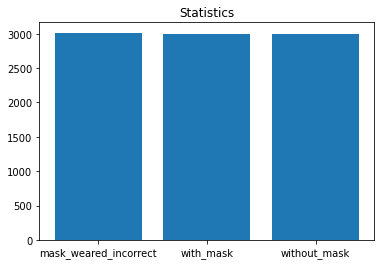

In [53]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  print(im_count) # list contains labels of all the images belonging to a particular class i.e. 'mask_weared_incorrect' or 'with_mask' or 'without_mask'
  print(this_path+'/'+im_count[0]) # printing the exact path of a particular image
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

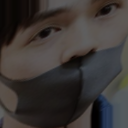



mask_weared_incorrect




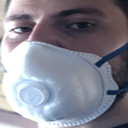



with_mask




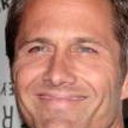



without_mask




In [54]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  image = this_path+'/'+im_count[8]
  testing=cv2.imread(image) # 3D array containing the pixel values
  cv2_imshow(testing)
  print("\n")
  print(label)
  print("\n")


In [55]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
import random
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  rand_no=random.randint(0,2994)
  print(rand_no)
  image = this_path+'/'+im_count[rand_no] #Checking the shape of 3 random images from the 3 different classes and we find all the images have the same shape (128,128,3)
  testing=cv2.imread(image)
  print(testing.shape)
  print(label)
  print('\n')

71
(128, 128, 3)
mask_weared_incorrect


1909
(128, 128, 3)
with_mask


1784
(128, 128, 3)
without_mask




In [56]:
# Check if all the images have same shape, else you need to resize them to some common size

# We maintain a flag variable so that if the value of the flag variable becomes true at any instant then we wiil find an image whose shape is diferent from (128,128,3)
flag=False
pixel=(128,128,3) # for comparison we contain a touple

for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  for i in range(len(im_count)):
    image = this_path+'/'+im_count[i] 
    testing=cv2.imread(image)
    if testing.shape!=pixel:
      flag=True

if(flag==True):
  print("Images have diffrent size")
else:
  print("Images have the same size")

# since flag=False hence all images have same size

# The code provided as it is above in the template will help 

Images have the same size


### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [57]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [58]:
# Choose and define base model
print(output_classes)
IMG_SIZE=(128,128,3)


base_model = keras.applications.ResNet50(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=IMG_SIZE,
    include_top=False, # Do not include the ImageNet classifier/ fully connected layer at the top.
)  



['mask_weared_incorrect', 'with_mask', 'without_mask']


In [59]:
# Print base model summary and have a look at the layers
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [60]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)

base_model.trainable = False # Freeze the base_model

In [61]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
inputs = keras.Input(shape=IMG_SIZE)
x = inputs
x = base_model(x, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512)(x)
x = keras.layers.Dropout(0.2)(x)  

In [62]:
# Add the final output layer
outputs = keras.layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [63]:
# Print your model's summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 40,366,979
Trainable params: 16,779,267
Non-t

In [64]:
# Compile you model (set the parameters like loss/optimizers/metrics)
model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.001),
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)


### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [65]:
# from keras.applications.vgg16 import preprocess_input # Change according to your base model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import ImageDataGenerator

label_datagen = ImageDataGenerator( rescale = 1./255, validation_split=0.2)
# Your code 

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [68]:
from keras.backend import categorical_crossentropy
# Your code
train_label_generator = label_datagen.flow_from_directory(
    directory=path,
    target_size=(128,128),
    subset="training",
    class_mode='categorical',
    batch_size=32)
validation_label_generator = label_datagen.flow_from_directory(
    directory=path,
    target_size=(128,128),
    subset="validation",
    class_mode='categorical',
    batch_size=32)

Found 7204 images belonging to 3 classes.
Found 1798 images belonging to 3 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [69]:
from keras.callbacks import ModelCheckpoint

history = model.fit(train_label_generator, validation_data=validation_label_generator, epochs=10, workers=4, batch_size=32)
# ModelCheckpoint is helpful to save the model giving best results (brownie points)

Epoch 1/10
226/226 [==============================] - 505s 2s/step - loss: 1.4955 - accuracy: 0.6390 - val_loss: 0.5426 - val_accuracy: 0.7864
Epoch 2/10
226/226 [==============================] - 481s 2s/step - loss: 0.6392 - accuracy: 0.7658 - val_loss: 0.5708 - val_accuracy: 0.7592
Epoch 3/10
226/226 [==============================] - 487s 2s/step - loss: 0.5296 - accuracy: 0.8001 - val_loss: 0.4819 - val_accuracy: 0.8220
Epoch 4/10
226/226 [==============================] - 483s 2s/step - loss: 0.4557 - accuracy: 0.8261 - val_loss: 0.7411 - val_accuracy: 0.7230
Epoch 5/10
226/226 [==============================] - 482s 2s/step - loss: 0.4044 - accuracy: 0.8484 - val_loss: 0.3754 - val_accuracy: 0.8637
Epoch 6/10
226/226 [==============================] - 483s 2s/step - loss: 0.5058 - accuracy: 0.8155 - val_loss: 0.5950 - val_accuracy: 0.7631
Epoch 7/10
226/226 [==============================] - 485s 2s/step - loss: 0.4716 - accuracy: 0.8250 - val_loss: 0.5747 - val_accuracy: 0.7647

### Evaluate the performance

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


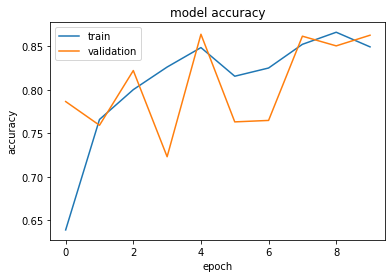

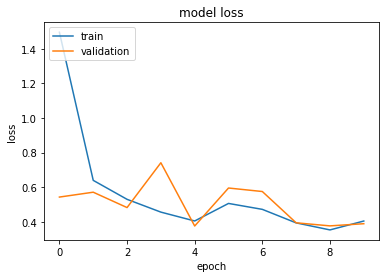

In [72]:
# Plot training & validation loss/accuracy values
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

validation_classes = []
validation_images = []
for i in range( -(-validation_label_generator.samples // validation_label_generator.batch_size)):
   batch = validation_label_generator.next()
   expected = np.argmax(batch[1], axis=1) 
   validation_classes.extend(expected)
   validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model.predict(validation_images)
y_pred = np.argmax(Y_pred, axis=1)


print(classification_report(validation_classes, y_pred, 
		target_names = ['mask_weared_incorrect', 'with_mask', 'without_mask']))
# print classification report

                       precision    recall  f1-score   support

mask_weared_incorrect       0.84      0.91      0.87       602
            with_mask       0.80      0.88      0.84       598
         without_mask       0.98      0.80      0.88       598

             accuracy                           0.86      1798
            macro avg       0.87      0.86      0.86      1798
         weighted avg       0.87      0.86      0.86      1798

